In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('Three_Channels_EMG_DATA.csv')
df.head()

,1,2,3,4,5,6,7,8,9,10,...,1016,1017,1018,1019,1020,1021,1022,1023,1024,CLASS
0,82,0,24,77,0,16,79,16,28,45,...,0,19,173,5,23,56,0,26,62,0
1,0,18,79,0,20,67,4,22,67,0,...,20,83,0,20,81,0,21,60,0,0
2,20,75,0,20,86,0,17,90,0,15,...,114,0,34,102,6,60,86,0,39,0
3,81,0,28,69,1,28,60,14,58,62,...,4,27,67,2,63,84,0,25,83,0
4,0,17,83,0,15,91,0,17,179,0,...,22,96,0,27,88,0,45,97,0,0


In [10]:
print(df.shape)

(1701, 1025)


In [18]:
features = df.drop(columns=["CLASS"])
features.head()

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,82,0,24,77,0,16,79,16,28,45,...,63,0,19,173,5,23,56,0,26,62
1,0,18,79,0,20,67,4,22,67,0,...,0,20,83,0,20,81,0,21,60,0
2,20,75,0,20,86,0,17,90,0,15,...,25,114,0,34,102,6,60,86,0,39
3,81,0,28,69,1,28,60,14,58,62,...,72,4,27,67,2,63,84,0,25,83
4,0,17,83,0,15,91,0,17,179,0,...,0,22,96,0,27,88,0,45,97,0


In [19]:
print (features.shape)

(1701, 1024)


In [20]:
Classes = df["CLASS"]
print(Classes.shape)
print("class :", Classes.unique())
print("Value Count :\n",Classes.value_counts())

(1701,)
class : [0 1 2 3 4]
Value Count :
 0    358
3    345
4    344
2    328
1    326
Name: CLASS, dtype: int64


In [75]:
features_2D = features.to_numpy().reshape(1701, 32, 32, 1)

print (features_2D.shape)

(1701, 32, 32, 1)


In [22]:
features_2D.max()

723

In [23]:
features_2D = features_2D /723.0
features_2D.max()

1.0

In [24]:
from sklearn.model_selection import train_test_split
# 80 and 20
x_train, x_test, y_train, y_test = train_test_split(features_2D, Classes, test_size=0.2, random_state=1)

In [25]:
print (x_train.shape)
print (y_train.shape)

print (x_test.shape)
print (y_test.shape)

(1360, 32, 32, 1)
(1360,)
(341, 32, 32, 1)
(341,)


In [26]:
# one hot encoding Labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


print (x_train.shape)
print (y_train.shape)

print (x_test.shape)
print (y_test.shape)

(1360, 32, 32, 1)
(1360, 5)
(341, 32, 32, 1)
(341, 5)


In [2]:
model = tf.keras.models.Sequential([
    # the input shape is the size of the image from ImageDataGenerator, 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(32, 32, 1)),
    tf.keras.layers.MaxPooling2D(2,2,padding='same'),
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2,padding='same'), 
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2,padding='same'),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 128 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(5, activation='softmax')  
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 64)          9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

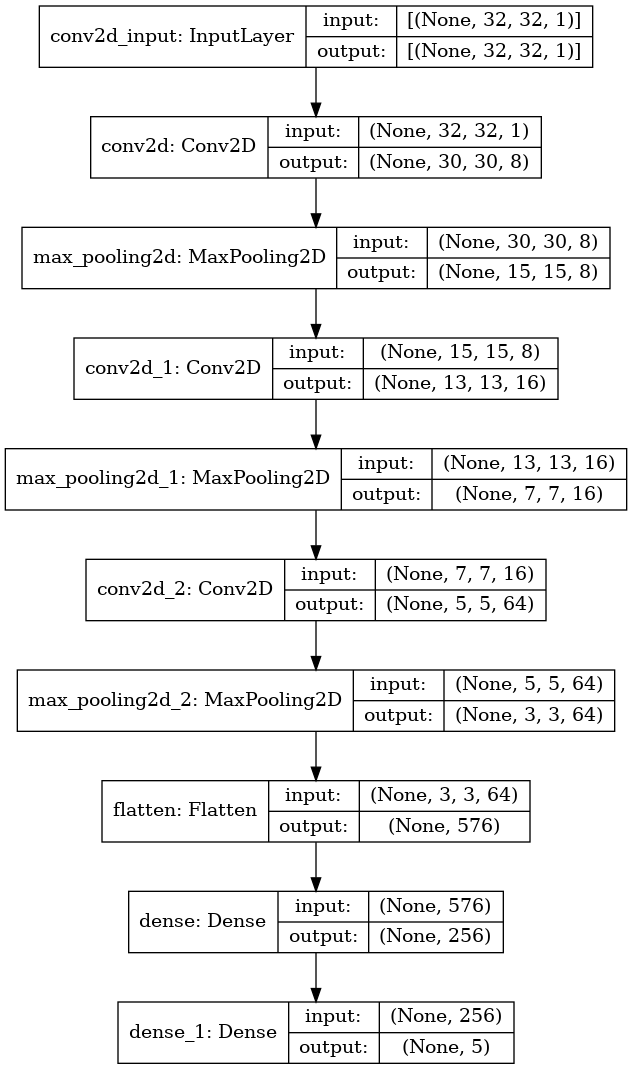

In [3]:
dot_img_file = '/tmp/model_1.png'

tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [65]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [66]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    steps_per_epoch=5,
                    epochs=30,
                    validation_steps=1)

Epoch 1/30
5/5 [==============================] - 1s 103ms/step - loss: 0.6682 - accuracy: 0.2313 - val_loss: 0.5840 - val_accuracy: 0.4047
Epoch 2/30
5/5 [==============================] - 0s 71ms/step - loss: 0.5536 - accuracy: 0.2821 - val_loss: 0.5049 - val_accuracy: 0.2199
Epoch 3/30
5/5 [==============================] - 0s 72ms/step - loss: 0.5144 - accuracy: 0.2128 - val_loss: 0.4961 - val_accuracy: 0.3812
Epoch 4/30
5/5 [==============================] - 0s 73ms/step - loss: 0.4901 - accuracy: 0.3996 - val_loss: 0.4839 - val_accuracy: 0.3900
Epoch 5/30
5/5 [==============================] - 0s 74ms/step - loss: 0.4805 - accuracy: 0.3984 - val_loss: 0.4572 - val_accuracy: 0.3900
Epoch 6/30
5/5 [==============================] - 0s 71ms/step - loss: 0.4478 - accuracy: 0.3961 - val_loss: 0.4137 - val_accuracy: 0.5425
Epoch 7/30
5/5 [==============================] - 0s 71ms/step - loss: 0.4045 - accuracy: 0.5799 - val_loss: 0.3706 - val_accuracy: 0.5601
Epoch 8/30
5/5 [==========

Text(0.5, 1.0, 'Training and validation loss')

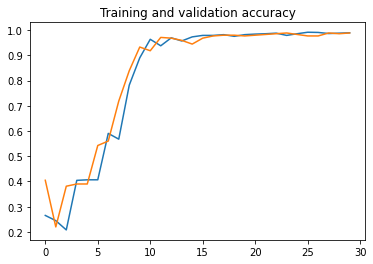

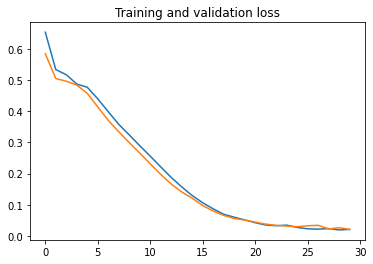

In [67]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [68]:
loss, acc = model.evaluate(x_test, y_test, batch_size = 4)
print("Test loss :",loss)
print("Test accuracy :",acc*100,"%")

86/86 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9883
Test loss : 0.02128930762410164
Test accuracy : 98.82698059082031 %


In [69]:
import time
start_time = time.time()

print("Predicted Class: ", np.round(model.predict(x_test)[0]))
print("Actual Class: ", (y_test[0]))


print("--- %s seconds ---" % (time.time() - start_time))

Predicted Class:  [0. 0. 0. 0. 1.]
Actual Class:  [0. 0. 0. 0. 1.]
--- 0.1391615867614746 seconds ---


# Test in real time

In [36]:
import time
import numpy as np
import serial 
from scipy.fftpack import fft

from IPython.display import clear_output


In [ ]:
arduinoData = serial.Serial('/dev/ttyACM0', 115200, timeout=1, rtscts=True)

while True:
    
    x = np.array([1024,])
    for i in range(1023):
        #x = np.empty(shape = 150,dtype = int)
        data = (int(arduinoData.readline().decode('ascii')))
        x = np.append(x,data) 
    
    x = x.reshape (-1,32,32,1)
    x = x/x.max()
    #print (x [0][0][0])
    print("Predicted Class: ", np.round(model.predict(x)))
    clear_output(wait=True)